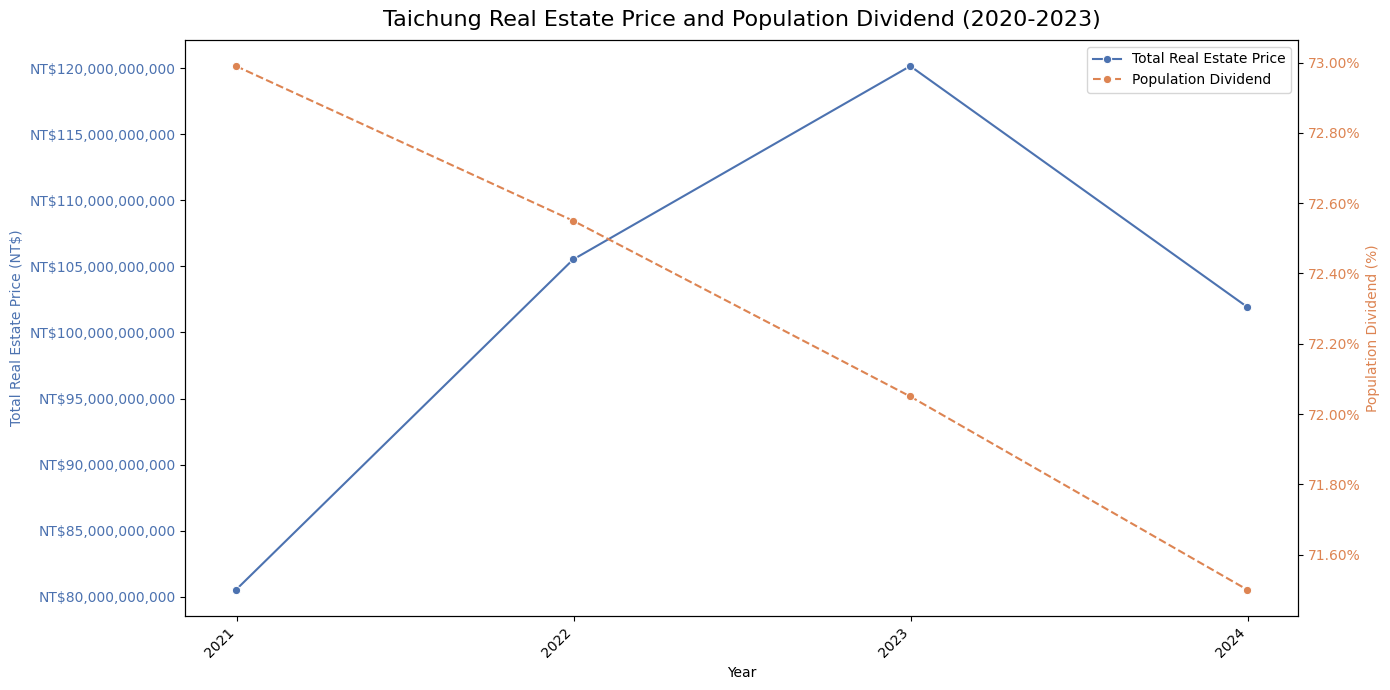

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# 讀取數據
house_df = pd.read_csv('/Users/jennifershih/Downloads/house_Taichung.csv', parse_dates=['交易年月日'])
calculation_df = pd.read_csv('/Users/jennifershih/Downloads/calculation_Taichung.csv', parse_dates=['年月'])

# 確保"人口紅利"為數字型態，並保留百分比格式
calculation_df['人口紅利=(15~64人數)/總人口數'] = calculation_df['人口紅利=(15~64人數)/總人口數'].replace({'%': ''}, regex=True).astype(float)

# 提取每年的房價總價元數據
house_df['交易年月日'] = house_df['交易年月日'].dt.to_period('Y').dt.to_timestamp() + pd.offsets.YearEnd(0)
house_yearly = house_df.groupby(house_df['交易年月日']).agg({'總價元': 'sum'}).reset_index()

# 提取每年的最後一個月份的人口紅利數據
calculation_df['年月'] = calculation_df['年月'].dt.to_period('Y').dt.to_timestamp() + pd.offsets.YearEnd(0)
demographic_yearly = calculation_df.groupby(calculation_df['年月']).agg({'人口紅利=(15~64人數)/總人口數': 'mean'}).reset_index()

# 設定起始日期
start_date = pd.Timestamp('2020-01-01')

# 篩選數據，只保留2020年1月1日之後的數據
house_yearly = house_yearly[house_yearly['交易年月日'] >= start_date]
demographic_yearly = demographic_yearly[demographic_yearly['年月'] >= start_date]

# 合併數據
merged_df = pd.merge(house_yearly, demographic_yearly, left_on='交易年月日', right_on='年月', how='inner')

# 創建圖形和坐標軸
fig, ax1 = plt.subplots(figsize=(14, 7))

# 定義 Seaborn 調色盤
palette = sns.color_palette("deep", n_colors=2)

# 繪製房價（折線圖）
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Real Estate Price (NT$)', color=palette[0])
sns.lineplot(data=merged_df, x='交易年月日', y='總價元', ax=ax1, color=palette[0], linestyle='-', marker='o', label='Total Real Estate Price')
ax1.tick_params(axis='y', labelcolor=palette[0])

# 設置左側 Y 軸顯示為整數並且顯示為元
ax1.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'NT${int(x):,}'))

# 創建第二個 Y 軸
ax2 = ax1.twinx()
ax2.set_ylabel('Population Dividend (%)', color=palette[1])

# 繪製人口紅利（折線圖）
sns.lineplot(data=merged_df, x='交易年月日', y='人口紅利=(15~64人數)/總人口數', ax=ax2, color=palette[1], linestyle='--', marker='o', label='Population Dividend')
ax2.tick_params(axis='y', labelcolor=palette[1])

# 設置右側 Y 軸顯示為百分比
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

# 設置 X 軸刻度格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 旋轉 X 軸刻度標籤
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

# 添加標題
plt.title('Taichung Real Estate Price and Population Dividend (2020-2023)', fontsize=16, pad=10)

# 清除舊圖例（防止重複）
ax1.get_legend().remove()
ax2.get_legend().remove()

# 添加圖例並設定位置
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 合併圖例
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1, 1))

# 避免標籤重疊
fig.tight_layout()

# 顯示圖表
plt.show()
